In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import functools
from functools import reduce
import time
import sys
import math

In [ ]:
#only needed if load_windgps_data_to_pandas and process_windgps_data are not in the current directory
sys.path.append('/Users/Downloads/gps_wind_station-master') # add path where the following python modules live

In [2]:
import load_windgps_data_to_pandas
import process_windgps_data

In [3]:
def latlon_to_xyz(lat,lon):
    """Convert angluar to cartesian coordiantes

    latitude is the 90deg - zenith angle in range [-90;90]
    lonitude is the azimuthal angle in range [-180;180] 
    """
    r = 6371 # https://en.wikipedia.org/wiki/Earth_radius
    theta = math.pi/2 - math.radians(lat) 
    phi = math.radians(lon)
    x = r * math.sin(theta) * math.cos(phi) # bronstein (3.381a)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    return [x,y,z]

In [4]:
# where your binary data files are
data_directoryA = 'rawwindbins/7.7.21/A/'
data_directoryB = 'rawwindbins/7.7.21/B/'
data_directoryC = 'rawwindbins/7.7.21/C/'
data_directoryD = 'rawwindbins/7.7.21/D/'
data_directoryE = 'rawwindbins/7.7.21/E/'
data_directoryF = 'rawwindbins/7.7.21/F/'
data_directoryG = 'rawwindbins/7.7.21/G/'
data_directoryH = 'rawwindbins/7.7.21/H/'
data_directoryI = 'rawwindbins/7.7.21/I/'

In [5]:
correct_year = 2021
out = '.' # in this directory

In [6]:
df1 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryA)
df2 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryB)
df3 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryC)
df4 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryD)
df5 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryE)
df6 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryF)
df7 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryG)
df8 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryH)
df9 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryI)

Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100
Number of data records per block:  110
Number of fill bytes per block:  100


In [7]:
alldfs=[df1,df2, df3, df4,df5,df6,df8,df9]

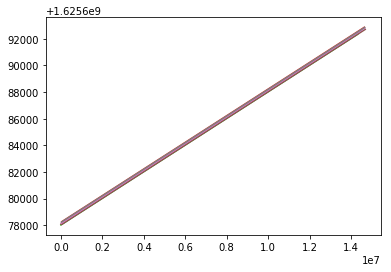

In [8]:
#fix any time errors
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.fix_millis_errors(alldfs[i])
    alldfs[i] = process_windgps_data.fix_gps_date(alldfs[i], correct_year=correct_year)
    alldfs[i] = process_windgps_data.calc_interpolated_epoch_time(alldfs[i])
    plt.plot(alldfs[i].millis, alldfs[i].time_epoch)

In [9]:
for i in range (0, len(alldfs)):
    print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(alldfs[i].time_epoch.iloc[0])))

2021-07-07 10:15:49
2021-07-07 10:14:30
2021-07-07 10:13:40
2021-07-07 10:17:43
2021-07-07 10:15:13
2021-07-07 10:14:13
2021-07-07 10:15:50
2021-07-07 10:17:16


In [10]:
#create separate columns for speed, direction,etc.
for i in range(0,len(alldfs)):
    alldfs[i] = process_windgps_data.parse_and_save_several_wind_strings(alldfs[i], wind_strings=['S2', 'D', 'T', 'U', 'V', 'W'])


In [11]:
#convert lat,lon cords to x,y,z
for i in range(0,len(alldfs)):
    x,y,z=latlon_to_xyz(np.array(alldfs[i].lat.mode()), np.array(alldfs[i].lon.mode()))
    alldfs[i]['X']=x
    alldfs[i]['Y']=y
    alldfs[i]['Z']=z

In [12]:
#save files as separate hdfs
names=['SensorA','SensorB', 'SensorC', 'SensorD', 'SensorE', 'SensorF', 'SensorG', 'SensorH', 'SensorI']
for i in range(0,len(alldfs)):
    alldfs[i].to_hdf(names[i] + '_7.7.21', key='/windgps')


/home/flybot/.local/lib/python3.5/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['wind', 'gps_date_str', 'gps_time_str']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [13]:
#read in hdfs
df1=pd.read_hdf('SensorA_7.7.21')
df2=pd.read_hdf('SensorB_7.7.21')
df3=pd.read_hdf('SensorC_7.7.21')
df4=pd.read_hdf('SensorD_7.7.21')
df5=pd.read_hdf('SensorE_7.7.21')
df6=pd.read_hdf('SensorF_7.7.21')
df7=pd.read_hdf('SensorG_7.7.21')
df8=pd.read_hdf('SensorH_7.7.21')
df9=pd.read_hdf('SensorI_7.7.21')
df1

,millis,lat,lon,gps_time,gps_date,wind,gps_date_str,year,month,day,...,time_epoch,S2,D,T,U,V,W,X,Y,Z
225,22972,1000.000000,1000.000000,171552,70721,b'\nS2 02.654 D 241 U 02.317 V 01.294 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.654,241.0,23.40,2.317,1.294,0.052,-2457.653527,-4277.76059,4031.1716
226,23072,1000.000000,1000.000000,171552,70721,b'\nS2 02.882 D 236 U 02.390 V 01.611 W -0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.882,236.0,23.33,2.390,1.611,-0.023,-2457.653527,-4277.76059,4031.1716
227,23172,1000.000000,1000.000000,171552,70721,b'\nS2 02.895 D 232 U 02.279 V 01.785 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.895,232.0,23.34,2.279,1.785,0.047,-2457.653527,-4277.76059,4031.1716
228,23272,1000.000000,1000.000000,171552,70721,b'\nS2 03.068 D 230 U 02.361 V 01.958 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,3.068,230.0,23.44,2.361,1.958,0.059,-2457.653527,-4277.76059,4031.1716
229,23372,1000.000000,1000.000000,171552,70721,b'\nS2 02.930 D 231 U 02.265 V 01.857 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.930,231.0,23.41,2.265,1.857,0.100,-2457.653527,-4277.76059,4031.1716
230,23472,1000.000000,1000.000000,171552,70721,b'\nS2 02.814 D 237 U 02.371 V 01.515 W -0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.814,237.0,23.44,2.371,1.515,-0.034,-2457.653527,-4277.76059,4031.1716
231,23572,1000.000000,1000.000000,171552,70721,b'\nS2 02.194 D 255 U 02.119 V 00.566 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.194,255.0,23.52,2.119,0.566,0.206,-2457.653527,-4277.76059,4031.1716
232,23672,1000.000000,1000.000000,171552,70721,b'\nS2 02.512 D 249 U 02.350 V 00.887 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.512,249.0,23.53,2.350,0.887,0.216,-2457.653527,-4277.76059,4031.1716
233,23772,1000.000000,1000.000000,171552,70721,b'\nS2 02.420 D 243 U 02.157 V 01.098 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,2.420,243.0,23.53,2.157,1.098,0.312,-2457.653527,-4277.76059,4031.1716
234,23872,1000.000000,1000.000000,171552,70721,b'\nS2 01.896 D 256 U 01.841 V 00.451 W 0...,070721,2021.0,7.0,7.0,...,1.625678e+09,1.896,256.0,23.52,1.841,0.451,0.300,-2457.653527,-4277.76059,4031.1716


In [14]:
#ADD suffixes to each DF for all values except time_epoch

df1=df1.add_suffix('_1')
df1=df1.rename(columns={"time_epoch_1":"time"})

df2=df2.add_suffix('_2')
df2=df2.rename(columns={"time_epoch_2":"time"})

df3=df3.add_suffix('_3')
df3=df3.rename(columns={"time_epoch_3":"time"})

df4=df4.add_suffix('_4_verticallyorientated')
df4=df4.rename(columns={"time_epoch_4_verticallyorientated":"time"})

df5=df5.add_suffix('_5')
df5=df5.rename(columns={"time_epoch_5":"time"})

df6=df6.add_suffix('_6')
df6=df6.rename(columns={"time_epoch_6":"time"})

df7=df7.add_suffix('_7_verticallyorientated')
df7=df7.rename(columns={"time_epoch_7_verticallyorientated":"time"})

df8=df8.add_suffix('_8')
df8=df8.rename(columns={"time_epoch_8":"time"})

df9=df9.add_suffix('_9')
df9=df9.rename(columns={"time_epoch_9":"time"})

In [15]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9]

In [16]:
#round all dfs to 1 decimal (their sampling rate)
decimals = 1
for i in range(0,len(dfs)):
    dfs[i]['time'] = dfs[i]['time'].apply(lambda x: round(x, decimals))


In [17]:
df_merged = reduce(lambda  left, right: pd.merge(left, right,on=['time'],
                                            how='inner'), dfs)

In [18]:
df_merged

,millis_1,lat_1,lon_1,gps_time_1,gps_date_1,wind_1,gps_date_str_1,year_1,month_1,day_1,...,gps_time_str_9,hour_9,minute_9,second_9,S2_9,D_9,T_9,U_9,V_9,W_9
0,136970,39.252392,-119.878105,171745,70721,b'\nS2 02.319 D 254 U 02.226 V 00.651 W -0...,070721,2021.0,7.0,7.0,...,171743,17,17,43,2.36,269.0,25.04,2.36,0.06,-0.07
1,137070,39.252380,-119.878113,171746,70721,b'\nS2 02.126 D 257 U 02.069 V 00.489 W -0...,070721,2021.0,7.0,7.0,...,171743,17,17,43,2.05,271.0,25.07,2.05,-0.02,0.04
2,137170,39.252380,-119.878113,171746,70721,b'\nS2 02.009 D 253 U 01.923 V 00.583 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.14,269.0,25.08,2.14,0.03,0.28
3,137270,39.252380,-119.878113,171746,70721,b'\nS2 01.990 D 256 U 01.928 V 00.491 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.22,268.0,25.06,2.22,0.09,0.12
4,137370,39.252380,-119.878113,171746,70721,b'\nS2 01.938 D 272 U 01.936 V -00.064 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.65,267.0,25.03,2.64,0.13,-0.05
5,137470,39.252380,-119.878113,171746,70721,b'\nS2 01.675 D 270 U 01.675 V -00.004 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.71,262.0,24.91,2.69,0.38,-0.06
6,137570,39.252380,-119.878113,171746,70721,b'\nS2 01.729 D 259 U 01.699 V 00.322 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.65,256.0,24.93,2.58,0.62,0.06
7,137670,39.252380,-119.878113,171746,70721,b'\nS2 01.942 D 265 U 01.934 V 00.173 W -0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.42,260.0,24.92,2.39,0.40,0.05
8,137770,39.252380,-119.878113,171746,70721,b'\nS2 02.136 D 263 U 02.122 V 00.242 W 0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.41,275.0,24.84,2.40,-0.22,0.02
9,137870,39.252380,-119.878113,171746,70721,b'\nS2 02.121 D 266 U 02.115 V 00.162 W 0...,070721,2021.0,7.0,7.0,...,171744,17,17,44,2.71,279.0,24.84,2.68,-0.43,-0.10


In [19]:
dt_wind = np.median(np.diff(df_merged.time.dropna().values))
print('dt Wind: ', dt_wind)

first_time = np.min([df_merged.time])
last_time = np.max([df_merged.time])
print(first_time,last_time)
master_time = np.arange(first_time, last_time, dt_wind)


dt Wind:  0.09999990463256836
1625678263.9 1625692084.5


In [20]:
df_merged.to_hdf('Merged_7.7.21.hdf', key='/windgps')

/home/flybot/.local/lib/python3.5/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->['wind_1', 'gps_date_str_1', 'gps_time_str_1', 'wind_2', 'gps_date_str_2', 'gps_time_str_2', 'wind_3', 'gps_date_str_3', 'gps_time_str_3', 'wind_4_verticallyorientated', 'gps_date_str_4_verticallyorientated', 'gps_time_str_4_verticallyorientated', 'wind_5', 'gps_date_str_5', 'gps_time_str_5', 'wind_6', 'gps_date_str_6', 'gps_time_str_6', 'wind_7_verticallyorientated', 'gps_date_str_7_verticallyorientated', 'gps_time_str_7_verticallyorientated', 'wind_8', 'gps_date_str_8', 'gps_time_str_8', 'wind_9', 'gps_date_str_9', 'gps_time_str_9']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
